# Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
#Display cell output for all expressions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Set max rows displayed in a cell
pd.set_option('display.max_rows', 15)

In [4]:
raw_data = pd.read_csv('Breast-Cancer-Wisconsin.csv')

#### Original Data Source & Field Descriptions
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

# Data Wrangling

#### Review Data

In [5]:
raw_data.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
raw_data.dtypes

Scn       int64
A2        int64
A3        int64
A4        int64
A5        int64
A6        int64
A7       object
A8        int64
A9        int64
A10       int64
CLASS     int64
dtype: object

In [7]:
len(raw_data.loc[raw_data['A7'] == '?']) #Count rows with missing data
raw_data.loc[raw_data['A7'] == '?'] #Show rows with missing data

16

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
292,563649,8,8,8,1,2,?,6,10,1,4
294,606140,1,1,1,1,2,?,2,1,1,2


#### Fix Missing Data

In [8]:
cleansed_data = raw_data
cleansed_data['A7'] = raw_data['A7'].replace('?', np.NaN)
cleansed_data['A7'] = pd.to_numeric(cleansed_data['A7'])

In [9]:
print(cleansed_data.isnull().sum())

Scn       0
A2        0
A3        0
A4        0
A5        0
A6        0
A7       16
A8        0
A9        0
A10       0
CLASS     0
dtype: int64


In [10]:
cleansed_data['A7'].fillna(value=cleansed_data['A7'].mean(), inplace=True)

In [11]:
print(cleansed_data.isnull().sum())

Scn      0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
CLASS    0
dtype: int64


#### Rename Columns/Values & Create Subsets

In [12]:
cleansed_data = cleansed_data.rename(columns={
     'Scn': 'id'\
    ,'A2': 'clump_thickness'
    ,'A3': 'uniform_cellsize'
    ,'A4': 'uniform_cellshape'
    ,'A5': 'marginal_adhesion'
    ,'A6': 'epithelial_cellsize'
    ,'A7': 'bare_nuclei'
    ,'A8': 'bland_chromatin'
    ,'A9': 'norm_nucleoli'
    ,'A10': 'mitoses'
    ,'CLASS': 'class'
})

In [13]:
cleansed_data['diagnosis'] = np.where(cleansed_data['class']==2, 'Benign', 'Malignant')

In [14]:
benign = cleansed_data.loc[cleansed_data['diagnosis'] == 'Benign']
malignant = cleansed_data.loc[cleansed_data['diagnosis'] == 'Malignant']

# Exploratory Data Analysis

#### Review Summary Statistics

In [15]:
cleansed_data.iloc[:, 1:].describe()

,clump_thickness,uniform_cellsize,uniform_cellshape,marginal_adhesion,epithelial_cellsize,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [16]:
cleansed_data.iloc[:, 1:10].var() #Display variance of each feature

clump_thickness         7.928395
uniform_cellsize        9.311403
uniform_cellshape       8.832265
marginal_adhesion       8.153191
epithelial_cellsize     4.903124
bare_nuclei            12.973335
bland_chromatin         5.945620
norm_nucleoli           9.324680
mitoses                 2.941492
dtype: float64

The features have very different variances. Recommendation is to standardize the features using StandardScaler.

In [17]:
cleansed_data.iloc[:, 1:10].corr()

,clump_thickness,uniform_cellsize,uniform_cellshape,marginal_adhesion,epithelial_cellsize,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034
uniform_cellsize,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693
uniform_cellshape,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633
epithelial_cellsize,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101
bare_nuclei,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169
norm_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000


Pairs with the highest correlations are:

1. uniform_cellsize & uniform_cellshape (.91)
2. uniform_cellsize & bland_chromatin (.76)
3. uniform_cellsize & epithelial_cellsize (.75)

In [18]:
print('Row Count:', cleansed_data.shape[0])
print('Column Count:', cleansed_data.shape[1])

Row Count: 699
Column Count: 12


In [19]:
print('Unique Row Count:', cleansed_data['id'].nunique())

Unique Row Count: 645


Duplicate rows exist.

#### Review Duplicates

In [20]:
cleansed_data['duplicate'] = cleansed_data.duplicated(subset='id', keep=False) #Add column to ID duplicate rows

In [21]:
cleansed_data[cleansed_data['duplicate'] == True].sort_values('id')

,id,clump_thickness,uniform_cellsize,uniform_cellshape,marginal_adhesion,epithelial_cellsize,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses,class,diagnosis,duplicate
267,320675,3,3,5,2,3,10.0,7,1,1,4,Malignant,True
272,320675,3,3,5,2,3,10.0,7,1,1,4,Malignant,True
575,385103,5,1,2,1,2,1.0,3,1,1,2,Benign,True
269,385103,1,1,1,1,2,1.0,3,1,1,2,Benign,True
271,411453,5,1,1,1,2,1.0,3,1,1,2,Benign,True
607,411453,1,1,1,1,2,1.0,1,1,1,2,Benign,True
684,466906,1,1,1,1,2,1.0,1,1,1,2,Benign,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,1320077,1,1,1,1,1,1.0,1,1,1,2,Benign,True
560,1321942,5,1,1,1,2,1.0,3,1,1,2,Benign,True


The dataset has duplicates, likely due to the same sample being measured at different points in time. Possible courses of action include:

1. Keep all observations/Don't adjust the data
2. Drop duplicate observations where all values are equal (e.g. Scn == '320675')
3. Drop all observations where duplicate==True
4. Drop duplicates except for the first occurrence
5. Drop duplicates except for the last occurrence

Current recommendation is #1.

#### Review Plots

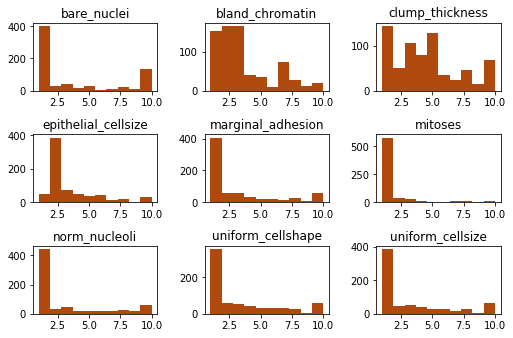

In [22]:
hist = cleansed_data.iloc[:, 1:10].hist(
     grid=False
    ,bins=10
    ,color='#af490d'
    ,alpha=1.0
)
plt.tight_layout(rect=(0,0,1.2,1.2))

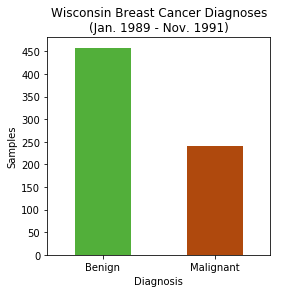

In [23]:
bar = cleansed_data.groupby(['diagnosis'])['id'].count().plot.bar(
     title='Wisconsin Breast Cancer Diagnoses\n(Jan. 1989 - Nov. 1991)'
    ,figsize=(4,4)
    ,rot=0
    ,color=('#52af3a', '#af490d')
)
_ = plt.xlabel('Diagnosis')
_ = plt.ylabel('Samples')
_ = plt.yticks(np.arange(0, 500, 50))

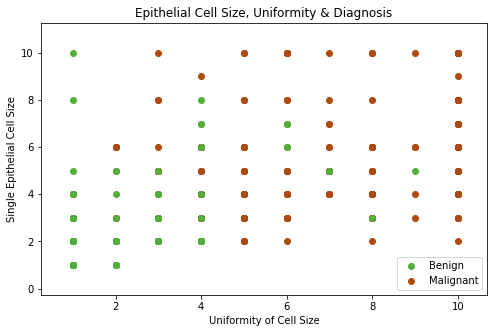

In [24]:
#Define color dictionary & Figure size
color_dict = ['#52af3a', '#af490d']
_ = plt.figure(figsize=(8,5))

#Create plot
scatter_malig = plt.scatter(malignant['uniform_cellsize'], malignant['epithelial_cellsize'], color=color_dict[1])
scatter_benign = plt.scatter(benign['uniform_cellsize'], benign['epithelial_cellsize'], color=color_dict[0])

#Define plot legend
_ = plt.legend((scatter_benign, scatter_malig),('Benign', 'Malignant'))

#Refine plot options
_ = plt.title('Epithelial Cell Size, Uniformity & Diagnosis')
_ = plt.xlabel('Uniformity of Cell Size')
_ = plt.ylabel('Single Epithelial Cell Size')
_ = plt.margins(x=0.075, y=0.125)

# Clustering Using KMeans - No Standardization

#### Create & Fit Model

In [25]:
#Create and fit model
model = KMeans(n_clusters=4).fit(cleansed_data.iloc[:, 1:10])

In [26]:
#Calculate cluster label create new dataset
labels = model.labels_
kmeans_data = cleansed_data
kmeans_data['cluster'] = labels
kmeans_data.head()

,id,clump_thickness,uniform_cellsize,uniform_cellshape,marginal_adhesion,epithelial_cellsize,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses,class,diagnosis,duplicate,cluster
0,1000025,5,1,1,1,2,1.0,3,1,1,2,Benign,False,1
1,1002945,5,4,4,5,7,10.0,3,2,1,2,Benign,False,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2,Benign,False,1
3,1016277,6,8,8,1,3,4.0,3,7,1,2,Benign,False,0
4,1017023,4,1,1,3,2,1.0,3,1,1,2,Benign,True,1


#### Evaluate Cluster Performance

In [27]:
#Crosstabulation
pd.crosstab(kmeans_data['cluster'], kmeans_data['diagnosis'])

diagnosis,Benign,Malignant
cluster,,
0,7,64
1,444,10
2,7,87
3,0,80


In [28]:
#Centroids
centroids_array = model.cluster_centers_
centroids_df = pd.DataFrame(centroids_array
                            ,columns = kmeans_data.iloc[:, 1:10].columns
                           )
centroids_df

,clump_thickness,uniform_cellsize,uniform_cellshape,marginal_adhesion,epithelial_cellsize,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses
0,7.464789,7.028169,6.676056,4.197183,5.535211,3.453220,5.380282,6.816901,2.309859
1,2.944934,1.244493,1.365639,1.292952,2.039648,1.351401,2.061674,1.200441,1.077093
2,7.234043,4.851064,5.042553,4.861702,4.117021,9.382979,5.265957,3.787234,1.648936
3,6.762500,8.387500,8.425000,7.750000,6.775000,9.212500,7.375000,7.737500,3.787500


In [29]:
#Inertia
print(model.inertia_)

15019.505116411576


#### Determine Optimal 

In [30]:
#Calculate Inertia
ks = range(1,16)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(kmeans_data.iloc[:, 1:10])
    inertias.append(model.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=13, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

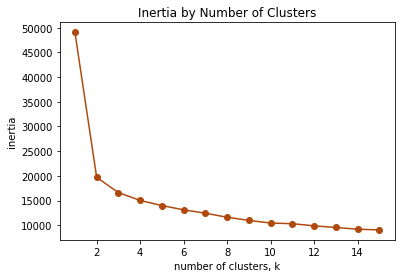

In [31]:
#Plot inertia
_ = plt.plot(ks, inertias, '-o', color='#af490d')
_ = plt.title('Inertia by Number of Clusters')
_ = plt.xlabel('number of clusters, k')
_ = plt.ylabel('inertia')
_ = plt.show()

Based on the inertia plot, I determine that 3 clusters are optimal.

# Clustering Using KMeans - With Standardization

#### Review Variance

In [32]:
kmeans_data.iloc[:, 1:10].describe()

,clump_thickness,uniform_cellsize,uniform_cellshape,marginal_adhesion,epithelial_cellsize,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [33]:
#Create arrays to use in plot
x_pos = np.arange(len(kmeans_data.iloc[0, 1:10]))
x_vars = kmeans_data.iloc[:, 1:10].columns
mean = np.mean(kmeans_data.iloc[:, 1:10], axis=0)
std = np.std(kmeans_data.iloc[:, 1:10], axis=0)

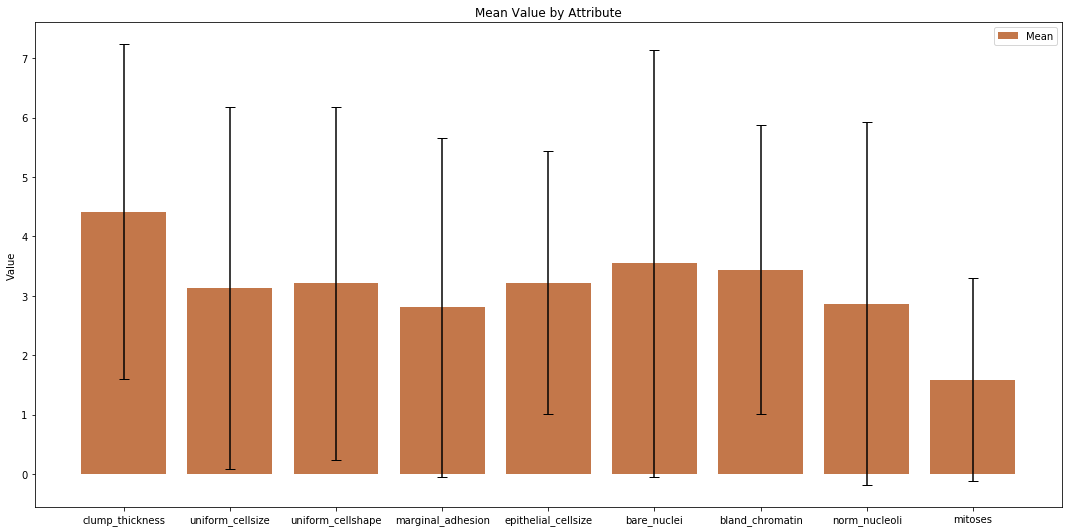

In [34]:
#Create plots
fig, ax = plt.subplots(figsize=(15,7.5))
bar = ax.bar(x_pos, mean, yerr=std, alpha=0.75, color='#af490d', capsize=5)
_ = ax.set_title('Mean Value by Attribute')
_ = ax.set_xticks(x_pos)
_ = ax.set_xticklabels(x_vars)
_ = ax.set_ylabel('Value')
_ = ax.legend(['Mean'])
plt.tight_layout()
plt.show()

Many of the attributes have high variance. This is especially true for Marginal Adhesion, Bare Nuclei, Normal Nucleoli, and Mitosis, as the standard deviation exceeds the mean.
Additionally, other attributes have standard deviations which are very close to the mean (Uniformity of Cellsize and Uniformity of Cell Shape) 

#### Create & Fit Pi

In [35]:
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(StandardScaler(), kmeans)
pipeline.fit(kmeans_data.iloc[:, 1:10])

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [36]:
#Calculate labels & append to dataset
labels = pipeline.predict(kmeans_data.iloc[:, 1:10])
kmeans_data_norm = kmeans_data
kmeans_data_norm['cluster'] = labels
kmeans_data_norm.head()

,id,clump_thickness,uniform_cellsize,uniform_cellshape,marginal_adhesion,epithelial_cellsize,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses,class,diagnosis,duplicate,cluster
0,1000025,5,1,1,1,2,1.0,3,1,1,2,Benign,False,0
1,1002945,5,4,4,5,7,10.0,3,2,1,2,Benign,False,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2,Benign,False,0
3,1016277,6,8,8,1,3,4.0,3,7,1,2,Benign,False,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2,Benign,True,0


#### Evaluate Cluster Performance

In [37]:
#Crosstabulation
pd.crosstab(kmeans_data_norm['cluster'], kmeans_data_norm['diagnosis'])

diagnosis,Benign,Malignant
cluster,,
0,445,11
1,0,34
2,13,196


In [38]:
#Inertia
pipeline.named_steps['kmeans'].inertia_

2297.266479332806

In [39]:
#Print centroids
centroids_array = pipeline.named_steps['kmeans'].cluster_centers_
centroids_df = pd.DataFrame(centroids_array
                            ,columns = kmeans_data_norm.iloc[:, 1:10].columns
                           )
centroids_df

,clump_thickness,uniform_cellsize,uniform_cellshape,marginal_adhesion,epithelial_cellsize,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses
0,-0.519453,-0.617289,-0.617027,-0.521036,-0.533704,-0.604305,-0.565767,-0.542833,-0.299127
1,1.168608,1.759606,1.772232,1.582941,1.869612,1.164301,1.389532,1.566504,3.809103
2,0.943244,1.060561,1.057936,0.879294,0.860298,1.129076,1.008351,0.929525,0.032978
